In [1]:
'''Leaky Integrate and Fire Neuron Model'''

'Leaky Integrate and Fire Neuron Model'

In [23]:
import numpy as np
from matplotlib.pyplot import *
from statistics import mode
import math

In [24]:
class Current:
    def __init__(self, i=4, c=4):
        self.i = i
        self.c = c
        
    def i_interval(self, time, interval = [40, 80]):
        start, end = interval
        if start < time and time < end:
            return self.i
        return 0
    
    def i_angle(self, time):
        if self.c % 2 == 0:
            return self.c * math.sin(time)
        else :
            return self.c * math.cos(time)
        
    def i_linear(self, time):
        return self.c * time
    
    def i_constant(self, time):
        return self.c
    
    def i_step(self, time, interval1=[0, 40], interval2=[50, 90]):
        start1, end1 = interval1
        start2, end2 = interval2
        if start1 < time < end1 or start2 < time < end2:
            return self.i
        return 0

In [26]:
class LIF:
    current = Current()
    def __init__(self, time_interval=100, dt=0.1, i_func=current.i_interval, u_rest=0, R=1, C=1, threshold=1):
        self.time_interval = time_interval
        self.dt = dt
        self.i_func = i_func
        self.u_rest = u_rest
        self.i_init = []
        self.timer = []
        self.R = R
        self.C = C
        self.threshold = threshold
        self.u = []

    def start(self):
            self.timer = np.arange(0, self.time_interval + self.dt, self.dt)
            u = [self.u_rest for i in self.timer]
            self.i_init = [self.i_func(j) for j in self.timer]
            const = self.R * self.C
            for t in range(len(self.timer)):
                u[t] = u[t-1] + (((-u[t-1] + self.u_rest) + self.R * self.i_init[t]) * self.dt) / const
                if u[t] >= self.threshold or u[t] < self.u_rest:
                    u[t] = self.u_rest
            self.u = u
            
    def time_period(self, i_const=0):
        time_periods = []
        const = self.R * self.C
        u = [self.u_rest for i in range(len(self.timer))]
        curr = Current(c=i_const)
        i_const = curr.i_constant(self.time_interval)
        prev_period = 0
        for t in range(len(self.timer)):
            u[t] = u[t-1] + (((-u[t-1] + self.u_rest) + self.R * i_const) * self.dt)/const
            if u[t] >= self.threshold :
                u[t] = self.u_rest
                time_periods.append(self.timer[t] - prev_period)
                prev_period = self.timer[t]
        m = mode(time_periods)
        return m      

In [27]:
class Plot:
    def __init__(self, lif):
        self.lif = lif
        
    def plot_ut(self):
        fig = figure(num=None, figsize=(20, 10))
        subplot(221)
        plot(lif.timer, lif.u)
        xlabel('Time')
        ylabel('U')
        title('U - time')
        grid(True)
        
    def plot_it(self):
        fig = figure(num=None, figsize=(20, 10))
        subplot(221)
        plot(lif.timer, lif.i_init)
        xlabel('Time')
        ylabel('I')
        title('I - time')
        grid(True)
        
    def plot_fi(self):
        fig = figure(num=None, figsize=(20, 10)) 
        const = lif.R * lif.C
        i_x = np.arange(0, max(lif.i_init), lif.dt)
        i_y = [0 for _ in range(len(i_x))]

        for j in range(len(i_x)):
            try:
                i_y[j] = 1 / (lif.time_period(i_const=i_x[j]))
            except:
                i_y[j] = 0                  
        subplot(221)
        plot(i_x, i_y)
        xlabel('I')
        ylabel('F')
        title('F - I')
        grid(True) 
        
    def plot_figs(self):
        self.plot_ut()
        self.plot_it()
        self.plot_fi()

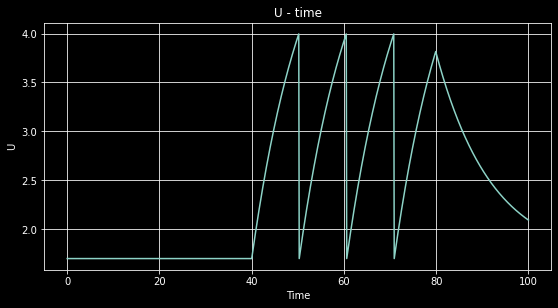

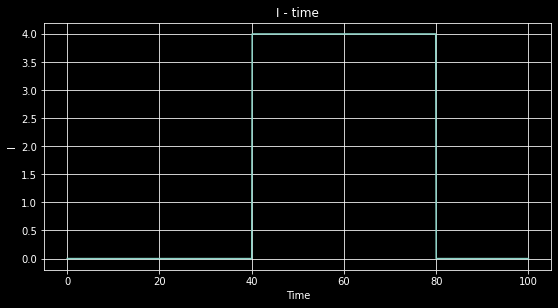

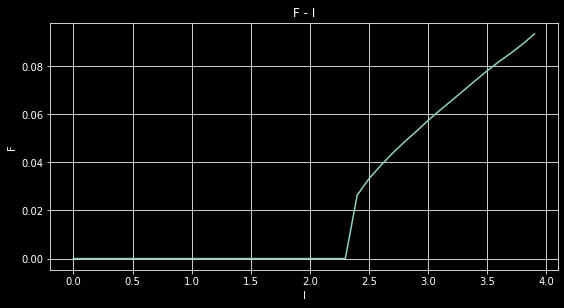

In [28]:
matplotlib.pyplot.style.use(['dark_background'])
current = Current(i=4)
lif = LIF(i_func = current.i_interval, u_rest = 1.7, C = 12, threshold = 4)
lif.start()
plt = Plot(lif)
plt.plot_figs()

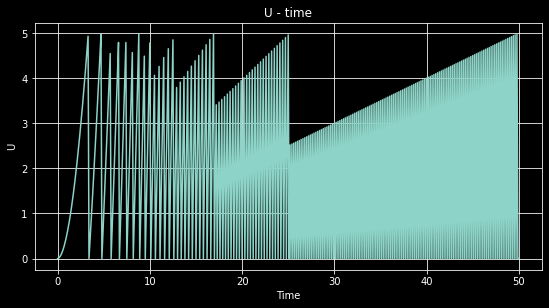

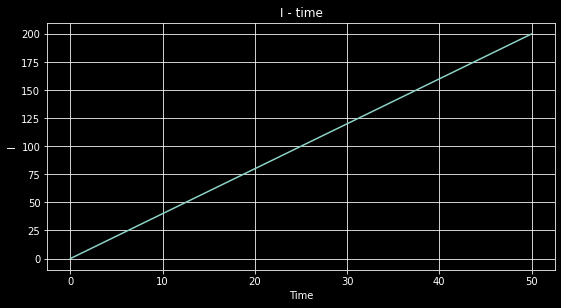

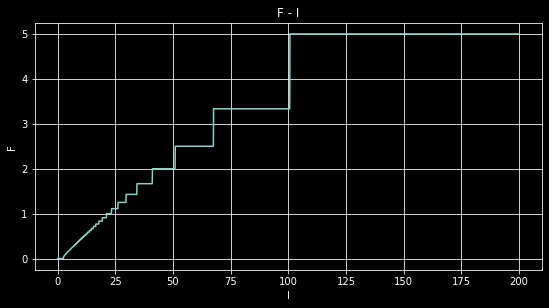

In [19]:
current = Current(i=4)
lif = LIF(time_interval=50, i_func=current.i_linear, u_rest=0, R=2, C=4, threshold=5)
lif.start()
plt = Plot(lif)
plt.plot_figs()

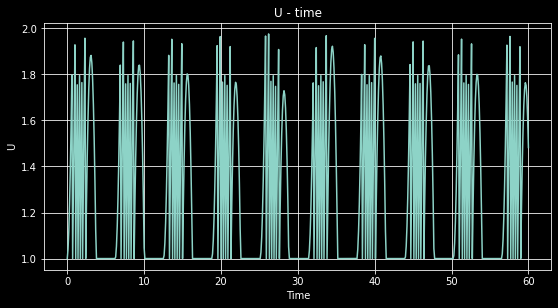

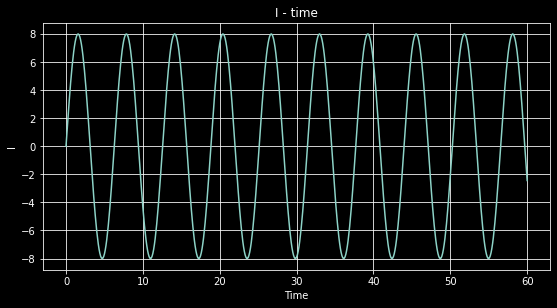

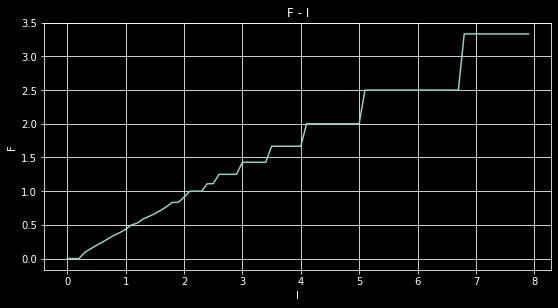

In [20]:
current = Current(i=7, c=8)
lif = LIF(time_interval=60, i_func=current.i_angle, u_rest=1, R=5, C=2, threshold=2)
lif.start()
plt = Plot(lif)
plt.plot_figs()

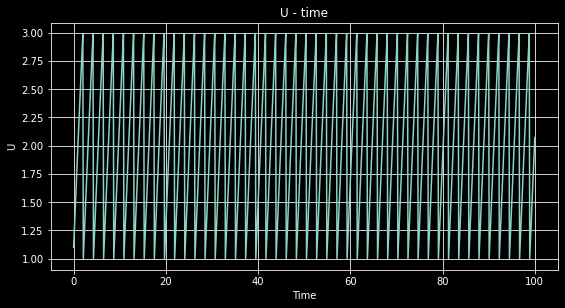

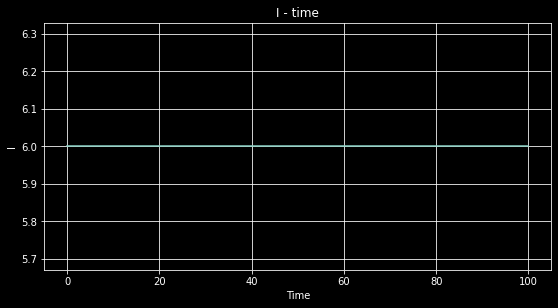

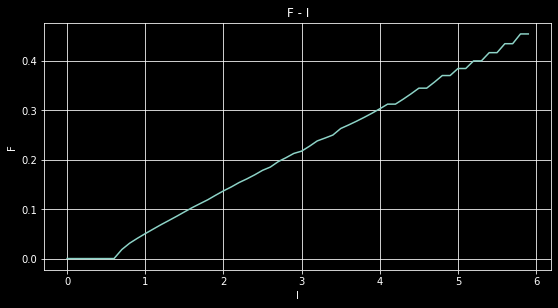

In [21]:
current = Current(i=3, c=6)
lif = LIF(time_interval=100, dt=0.1, i_func=current.i_constant, u_rest=1, R=3, C=6, threshold=3)
lif.start()
plt = Plot(lif)
plt.plot_figs()

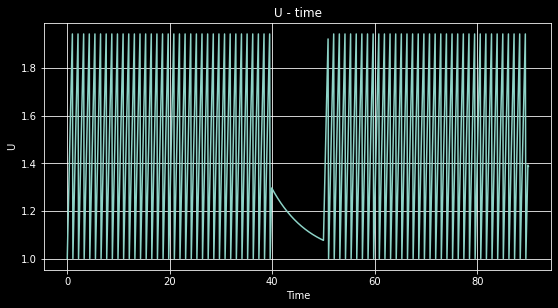

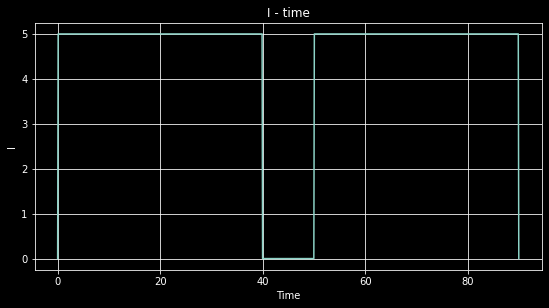

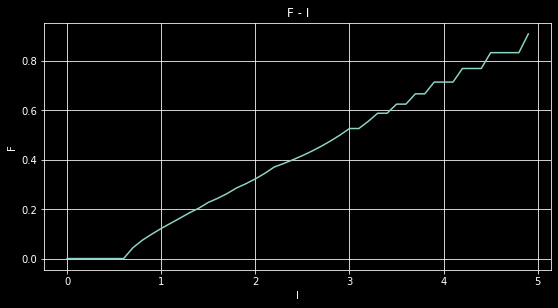

In [22]:
current = Current(i=5, c=10)
lif = LIF(time_interval=90, i_func=current.i_step, u_rest=1, R=1.5, C=5, threshold=2)
lif.start()
plt = Plot(lif)
plt.plot_figs()